UNIT 4 CAPSTONE - SPOTIFY WORLDWIDE DAILY SONG RANKING

In [1]:
#Import pandas, numpy, matplotlib, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Let's take a quick look at how the data is set up
df = pd.read_csv('data.csv')
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [188]:
#I'd like to take a look at the different regions
total_streams_region = df.groupby('Region')['Streams'].sum()
total_streams_region.shape
total_streams_region.head(54)


Region
ar         2776971684
at          344322232
au         3372128479
be          556799739
bo           97248182
br         6890194505
ca         3201208648
ch          487115409
cl         2191334779
co          834076562
cr          362874962
cz          208602150
de         6072757512
dk         1509648808
do          154057176
ec          318441639
ee           21653223
es         3754247012
fi         1246077272
fr         3146285237
gb         7185860296
global    76852243776
gr           58780418
gt          176974407
hk          295800351
hn           91375818
hu          152772228
id         1287300250
ie          648164942
is           80100254
it         2387015412
jp          315926822
lt           30363701
lu            6018470
lv           33654223
mx         6344670992
my          652284423
nl         3467630881
no         2011024798
nz          813211531
pa          131475020
pe         1079068853
ph         3320833608
pl          785350179
pt          441238052
py 

In [187]:
#We probably want to remove the 'global' designation from our array
df_not_global = df[df['Region'] != 'global']
df_not_global.std()

Position       57.381530
Streams     73425.794102
dtype: float64

In [101]:
#top ten regions by the sum of their streams
top_ten_regions = df_not_global.groupby('Region')['Streams'].sum().sort_values(ascending = False)[:10]
top_ten_regions

Region
us    26384680151
gb     7185860296
br     6890194505
mx     6344670992
de     6072757512
es     3754247012
nl     3467630881
au     3372128479
se     3367838798
ph     3320833608
Name: Streams, dtype: int64

In [192]:
#Looking at standard deviation of the top ten regions
top_ten_regions.std()

6992074320.519266

Text(0.5,1,'Top Ten Regions by Number of Streams')

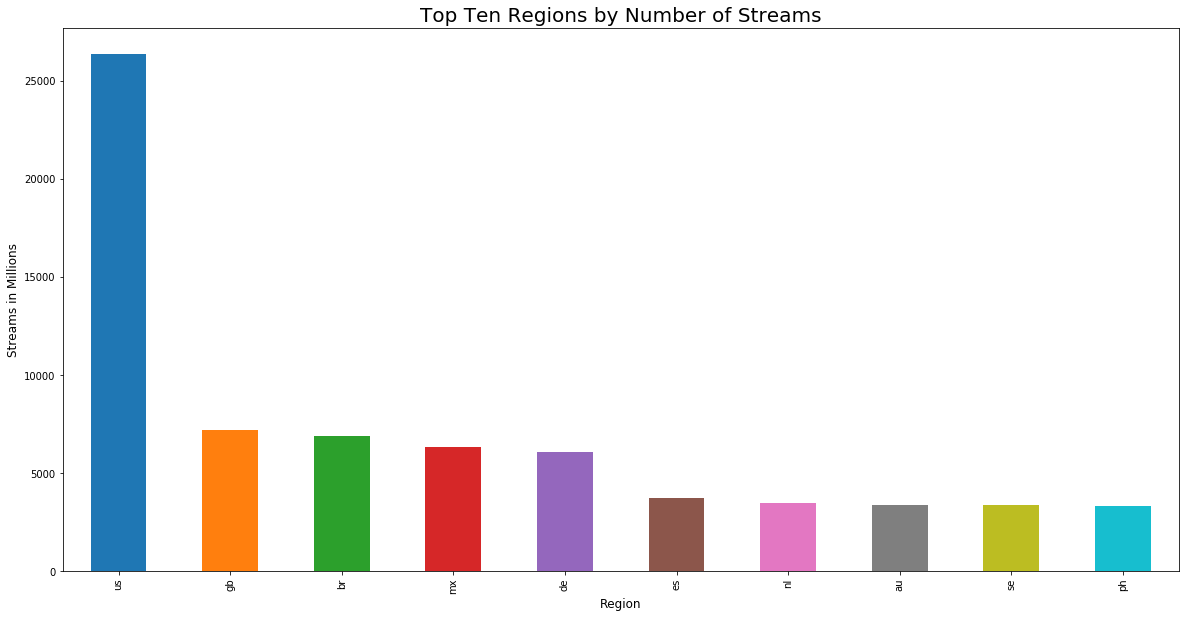

In [176]:
#visualize it
(top_ten_regions/1000000.0).plot.bar(figsize = (20,10))
plt.xlabel('Region', fontsize=12)
plt.ylabel('Streams in Millions', fontsize=12)
plt.title('Top Ten Regions by Number of Streams', fontsize=20)

In [99]:
#create a new dataframe exploring streams and track name
artiststreams = df[['Artist', 'Streams']]
sort_by_artist_stream = artiststreams.sort_values('Streams', ascending = False).drop_duplicates(['Artist'])
sort_by_artist_stream.head(10)
#not quite right, maybe try again aggregating the sum of streams

,Artist,Streams
3145443,Luis Fonsi,11381520
3128643,Ed Sheeran,9891056
3187043,Mariah Carey,8069105
3162843,Taylor Swift,7908492
3169843,Post Malone,7156650
3136843,Kendrick Lamar,6577558
3187044,Wham!,6485447
3141044,DJ Khaled,6017497
3132044,Drake,5626795
3163044,J Balvin,4967261


In [91]:
#top ten artists by the sum of their streams
top_ten_artists = df.groupby('Artist')['Streams'].sum().sort_values(ascending = False)[:10]
top_ten_artists

Artist
Ed Sheeran          8913973976
Drake               4523630992
The Chainsmokers    4292590087
Post Malone         3700404149
Kendrick Lamar      3570665303
Luis Fonsi          3555514919
J Balvin            2494735971
Calvin Harris       2397708371
Imagine Dragons     2322921399
DJ Khaled           2236224259
Name: Streams, dtype: int64

Text(0.5,1,'Top 10 Artists of 2017')

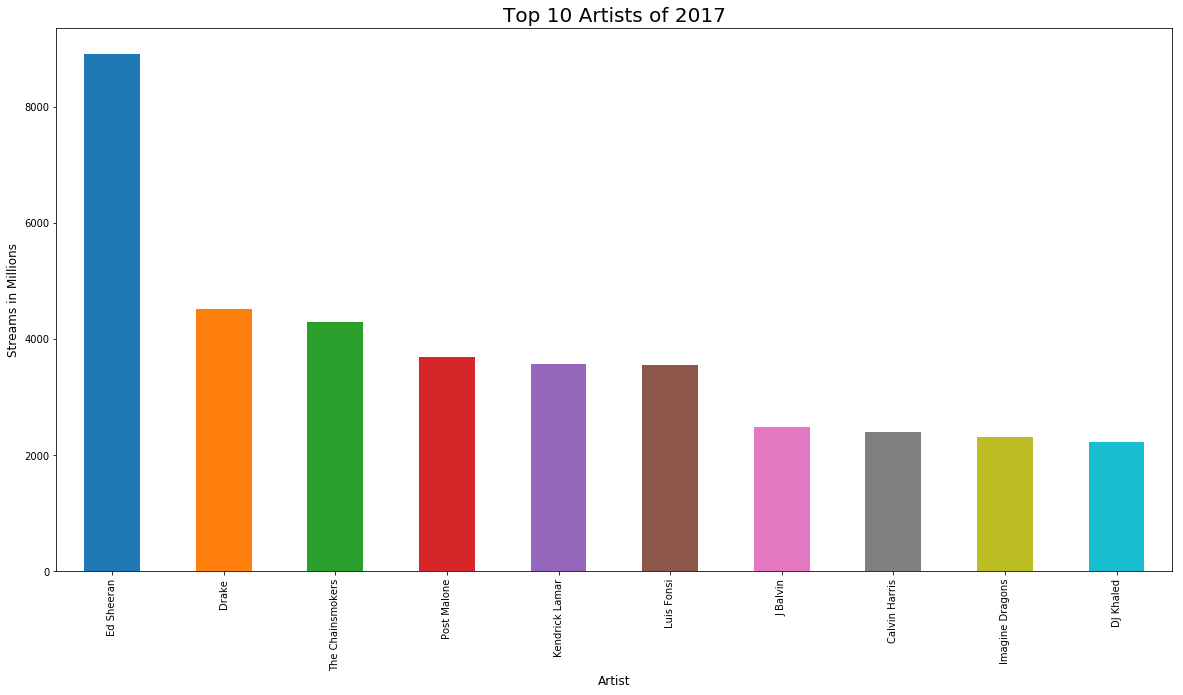

In [175]:
#Top ten artists plot

(top_ten_artists/1000000.0).plot.bar(figsize=(20,10))
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Streams in Millions', fontsize=12)
plt.title('Top 10 Artists of 2017', fontsize=20)

In [106]:
#top ten songs by the sum of their streams
top_ten_songs = df.groupby('Track Name')['Streams'].sum().sort_values(ascending = False)[:10]
top_ten_songs

Track Name
Shape of You                          2993988783
Despacito - Remix                     1829621841
Despacito (Featuring Daddy Yankee)    1460802540
Something Just Like This              1386258295
Unforgettable                         1366919951
HUMBLE.                               1311243745
rockstar                              1260181617
I'm the One                           1254196301
It Ain't Me (with Selena Gomez)       1190339348
XO TOUR Llif3                         1171827725
Name: Streams, dtype: int64

In [184]:
#What is the standard deviation on these streaming numbers for these top 10 songs?
#np.std(top_ten_songs[flt('Streams')], ddof=1)
top_ten_songs.std()

550242909.7009728

Text(0.5,1,'Top 10 Songs of 2017')

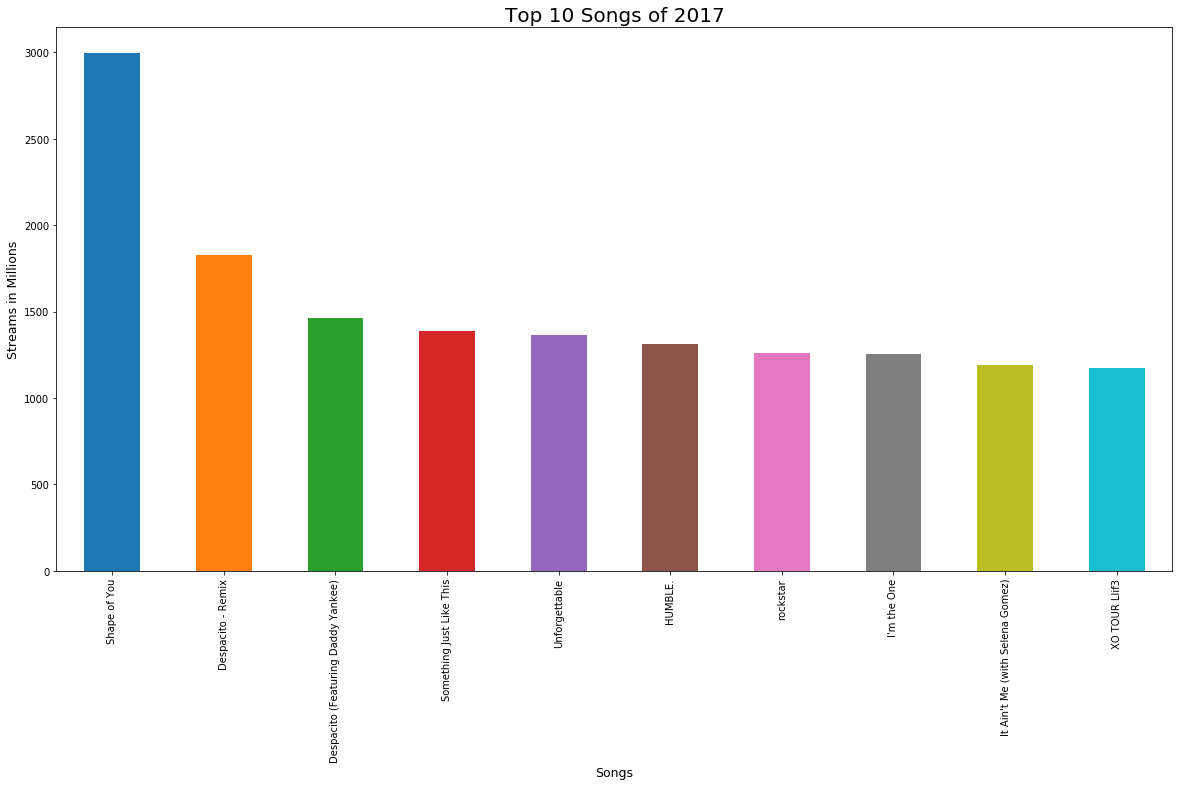

In [174]:
#top ten songs plot

(top_ten_songs/1000000.0).plot.bar(figsize=(20,10))
plt.xlabel('Songs', fontsize=12.5)
plt.ylabel('Streams in Millions', fontsize=12.5)
plt.title('Top 10 Songs of 2017', fontsize=20)

In [146]:
#Is there a particular time of years where people listen to more music?
streams_over_time = df.groupby('Date')['Streams'].sum()
streams_over_time.head()

Date
2017-01-01    342686592
2017-01-02    351583304
2017-01-03    375805417
2017-01-04    383073683
2017-01-05    385834107
Name: Streams, dtype: int64

In [147]:
#I wonder what type of data we're working with when it comes to date
df['Date'].dtype

dtype('O')

In [148]:
#Let's change that so the 'Date' designation is converted from object to date-time
df['New_Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y-%m-%d')
df['New_Date'].dtype

dtype('<M8[ns]')

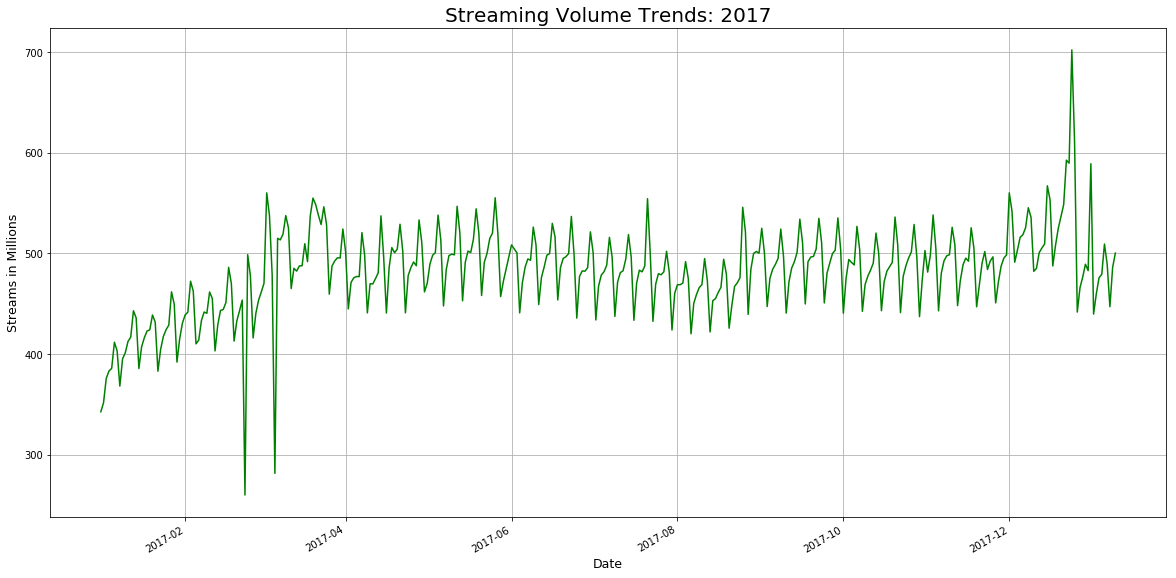

In [172]:
#Much better, let's take a look at what streaming volume trends look like over the full year
streams_over_time = df.groupby('New_Date')['Streams'].sum().sort_values(ascending=False)

(streams_over_time/1000000.0).plot(figsize=(20,10),grid=True,color='green')
plt.xlabel('Date',fontsize=12.5)
plt.ylabel('Streams in Millions',fontsize=12.5)
ax.set_xlim(xmin='2016-12', xmax='2018-02')
plt.title('Streaming Volume Trends: 2017', fontsize=20)
plt.show()

In [201]:
streams_over_time.head()

New_Date
2017-12-24    702111119
2017-12-25    611756081
2017-12-22    592601556
2017-12-23    589606820
2017-12-31    589048970
Name: Streams, dtype: int64

In [200]:
streams_over_time.tail()

New_Date
2017-01-08    368211987
2017-01-02    351583304
2017-01-01    342686592
2017-03-06    281524532
2017-02-23    260006992
Name: Streams, dtype: int64

In [150]:
#What are Mariah Carey's top tracks?
df_mariah_carey = df[df['Artist'] == 'Mariah Carey']

#top ten Mariah Carey songs by the sum of their streams
top_ten_mariah = df_mariah_carey.groupby('Track Name')['Streams'].sum().sort_values(ascending = False)[:10]
top_ten_mariah

Track Name
All I Want for Christmas Is You      224631196
Santa Claus Is Comin' to Town           708581
Christmas (Baby Please Come Home)       556800
O Holy Night                            184775
All I Want For Christmas Is You         106200
Oh Santa!                                89482
I Don't                                  69901
Hero                                     40431
Fantasy                                  33008
Without You                              21731
Name: Streams, dtype: int64

In [132]:
#When are people listening to "All I Want for Christmas Is You"? 
#I'd expect a significant bump in December, but are there other times where we'd see a bump?

mariah_christmas = df[df['Track Name'] == 'All I Want for Christmas Is You']
mariah_streams_over_time = mariah_christmas.groupby('New_Date')['Streams'].sum().sort_values(ascending=False)
mariah_streams_over_time.head()

New_Date
2017-12-24    16128375
2017-12-25    12949143
2017-12-23     9959537
2017-12-22     8630596
2017-12-21     7277584
Name: Streams, dtype: int64

In [133]:
#As expected, what about on the other side?
mariah_streams_over_time.tail()

New_Date
2017-11-03    28315
2017-01-06    20777
2018-01-06    16960
2018-01-04     6176
2017-01-07     2225
Name: Streams, dtype: int64

In [134]:
#Looks like Christmas fatigue is in full effect by the beginning of January

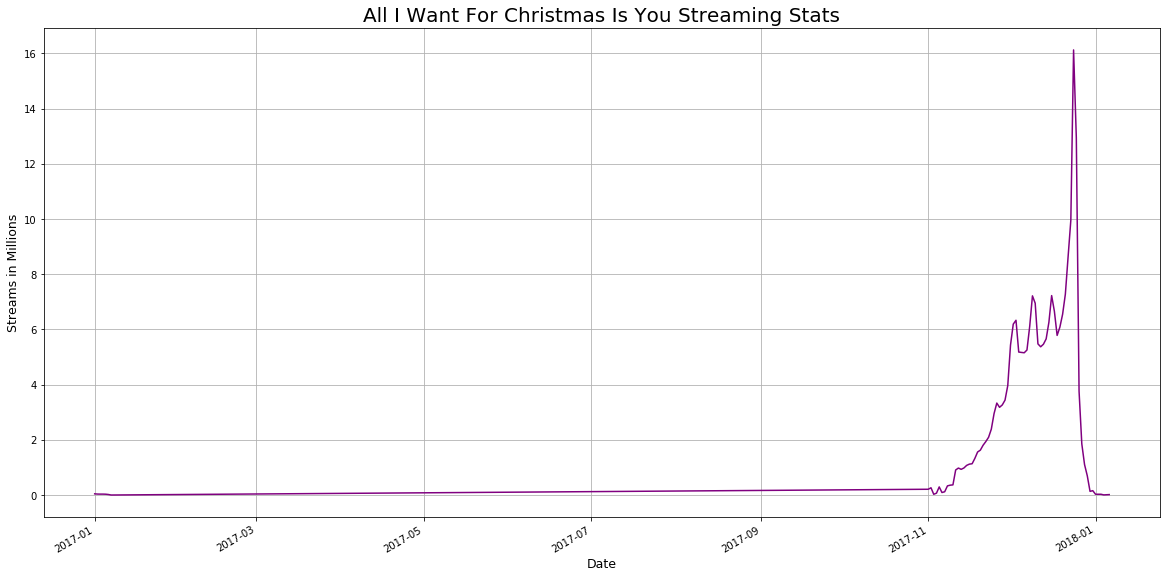

In [170]:
#Let's plot this across the year and see if there are any interesting bumps
#Dividing mariah_streams_over time by one million allows us to scale the y axis
(mariah_streams_over_time/1000000.0).plot(fontsize=10, figsize=(20,10),grid=True,color='purple')
plt.xlabel('Date',fontsize=12.5)
plt.ylabel('Streams in Millions',fontsize=12.5)
plt.title('All I Want For Christmas Is You Streaming Stats', fontsize=20)
ax.set_xlim(xmin='2016-12', xmax='2018-02')
plt.show()

In [151]:
#Now I'd like to see how the top 5 songs performed over the course of the year
#We'll have to go through the process above for each song on that list

ShapeOfYou_total = df[df['Track Name'] == 'Shape of You']
ShapeOfYou_over_time = ShapeOfYou_total.groupby('New_Date')['Streams'].sum().sort_values(ascending=False)

Despacito_total = df[df['Track Name'] == 'Despacito - Remix']
Despacito_over_time = Despacito_total.groupby('New_Date')['Streams'].sum().sort_values(ascending=False)

SomethingJust_total = df[df['Track Name'] == 'Something Just Like This']
SomethingJust_over_time = SomethingJust_total.groupby('New_Date')['Streams'].sum().sort_values(ascending=False)

Unforgettable_total = df[df['Track Name'] == 'Unforgettable']
Unforgettable_over_time = Unforgettable_total.groupby('New_Date')['Streams'].sum().sort_values(ascending=False)

Humble_total = df[df['Track Name'] == 'HUMBLE.']
Humble_over_time = Humble_total.groupby('New_Date')['Streams'].sum().sort_values(ascending=False)

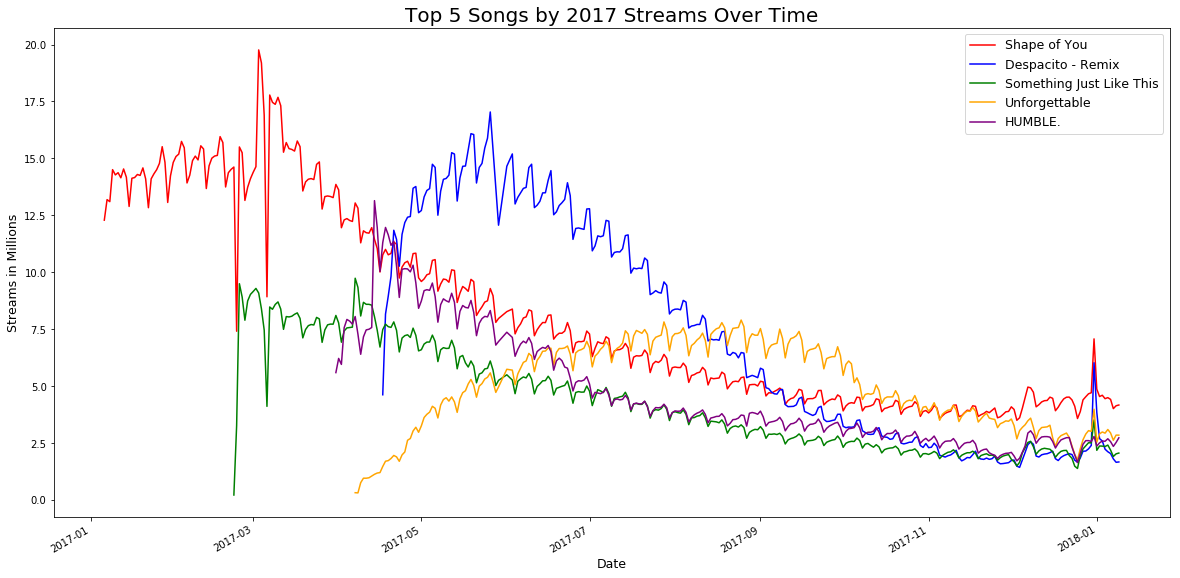

In [179]:
plt.subplots(figsize=(20,10))
(ShapeOfYou_over_time/1000000.0).plot(color='red', label='Shape of You')
(Despacito_over_time/1000000.0).plot(color='blue', label='Despacito - Remix')
(SomethingJust_over_time/1000000.0).plot(color='green', label='Something Just Like This')
(Unforgettable_over_time/1000000.0).plot(color='orange', label='Unforgettable')
(Humble_over_time/1000000.0).plot(color='purple', label='HUMBLE.')
plt.ylabel('Streams in Millions', fontsize=12.5)
plt.xlabel('Date', fontsize=12.5)
plt.title('Top 5 Songs by 2017 Streams Over Time', fontsize=20)
plt.legend(fontsize=12.5)
plt.show()